|<h2>Course:</h2>|<h1><a href="https://udemy.com/course/dullms_x/?couponCode=202508" target="_blank">A deep understanding of AI language model mechanisms</a></h1>|
|-|:-:|
|<h2>Part 1:</h2>|<h1>Tokenizations and embeddings<h1>|
|<h2>Section:</h2>|<h1>Words to tokens to numbers<h1>|
|<h2>Lecture:</h2>|<h1><b>CodeChallenge HELPER: Tokenizing The Time Machine<b></h1>|

<br>

<h5><b>Teacher:</b> Mike X Cohen, <a href="https://sincxpress.com" target="_blank">sincxpress.com</a></h5>
<h5><b>Course URL:</b> <a href="https://udemy.com/course/dullms_x/?couponCode=202508" target="_blank">udemy.com/course/dullms_x/?couponCode=202508</a></h5>
<i>Using the code without the course may lead to confusion or errors.</i>

In [2]:
# typical libraries...
import numpy as np
import matplotlib.pyplot as plt

# for importing and working with texts
import requests
import re
import string

# adjust matplotlib defaults to personal preferences
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Exercise 1: Get and prepare the text

In [8]:
# get raw text from internet
text = requests.get('https://www.gutenberg.org/files/35/35-0.txt').text

# character strings to replace with space
strings2replace = [ '\r\n\r\nâ\x80\x9c',
                    'â\x80\x9c',
                    'â\x80\x9d',
                    '\r\n',
                    'â\x80\x94',
                    'â\x80\x99',
                    'â\x80\x98',
                    '_', ]

# use regular expression (re) to replace those strings with space
for str2match in strings2replace:
  text = re.compile(r'%s'%str2match).sub(' ', text)


# remove non-ASCII characters and numbers, and make lower-case
text = re.sub(r'[^\x00-\x7F]+', ' ', text)

text = re.sub(r'\d+','',text).lower() #make this lowercase
print(text[:2000])

*** START OF THE PROJECT GUTENBERG EBOOK 35 ***     The Time Machine  An Invention  by H. G. Wells   CONTENTS   I Introduction  II The Machine  III The Time Traveller Returns  IV Time Travelling  V In the Golden Age  VI The Sunset of Mankind  VII A Sudden Shock  VIII Explanation  IX The Morlocks  X When Night Came  XI The Palace of Green Porcelain  XII In the Darkness  XIII The Trap of the White Sphinx  XIV The Further Vision  XV The Time Traveller s Return  XVI After the Story  Epilogue      I.  Introduction   The Time Traveller (for so it will be convenient to speak of him) was expounding a recondite matter to us. His pale grey eyes shone and twinkled, and his usually pale face was flushed and animated. The fire burnt brightly, and the soft radiance of the incandescent lights in the lilies of silver caught the bubbles that flashed and passed in our glasses. Our chairs, being his patents, embraced and caressed us rather than submitted to be sat upon, and there was that luxurious after

In [9]:
# split into words that contain >1 character
words = re.split(fr'[{string.punctuation}\s]+',text)
words = [item.strip() for item in words if item.strip()]
words = [word for word in words if len(word)>1]# save only the words with >1 chars

# create the vocab / lexicon
vocab = sorted(set(words))# a sorted set
nWords = len(words)
nLex = len(vocab)

In [18]:
# create the encoder/decoding mapping dictionaries
word2idx = {w:i for i,w in enumerate(vocab)}
idx2word = {i:w for i,w in enumerate(vocab)}


SyntaxError: invalid syntax (2522388916.py, line 5)

In [26]:
# create encoder and decoder functions
def encoder(words,encode_dict):
  
  # loop through the words and find their token in the vocab
  idxs = np.zeros(len(words),dtype=int)
  for i,w in enumerate(words):
    idxs[i]=encode_dict[w] 
  return

# and the decoder function
def decoder(idxs,decode_dict):  
  return ' '.join( [decode_dict[i] for i in  idxs]  )# the dictionary items

In [31]:
# idxs = [2,3,4,5,6]
# decode_dict = idx2word
# [decode_dict[i] for i in  idxs]

['able', 'abnormally', 'abominable', 'abominations', 'about']

# Exercise 2: A random walk through the Time Machine

In [32]:
# random tokens
randomTokens =np.random.randint(0,len(vocab),size=20)

# test with random token indices
print(f'Random tokens: \n\t{randomTokens}\n')
print(f'Decoded text: \n\t{decoder(randomTokens,idx2word)}')

Random tokens: 
	[2260 3864  960  365  322 3679 2844  907 4544 2806 1268 3439 2443 2117
 3387 3478 1848 2362   70 3403]

Decoded text: 
	lame streaming delicately beneath bearing smiles parcels darted world overwhelming engagement scream marble inspiration safety sensations harsh lips africa savages


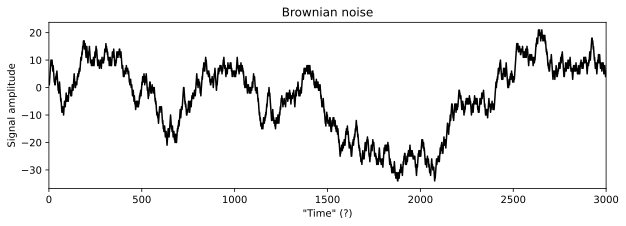

In [22]:
# A brief aside on Brownian noise
brownNoise = np.cumsum(np.random.choice([-1,1],3000))

plt.figure(figsize=(10,3))
plt.plot(brownNoise,'k')
plt.gca().set(xlim=[0,len(brownNoise)],xlabel='"Time" (?)',ylabel='Signal amplitude',title='Brownian noise')
plt.show()

In [36]:
np.random.choice(nLex,1)

array([794])

In [40]:
# Brownian noise
brownNoise = np.cumsum(np.random.choice([-1,1],30)) # a random sequence of +1 and -1
print(brownNoise)

BrownianRandomTokens = brownNoise + np.random.choice(nLex)
print(BrownianRandomTokens)
print('')

# test with random token indices
print(f'Brownian random tokens {BrownianRandomTokens}')
print(f'Decoded text = {decoder(BrownianRandomTokens,idx2word)}')

[ 1  0 -1 -2 -3 -2 -3 -2 -3 -4 -3 -4 -3 -2 -3 -2 -3 -4 -3 -4 -5 -4 -5 -4
 -5 -4 -3 -2 -3 -4]
[429 428 427 426 425 426 425 426 425 424 425 424 425 426 425 426 425 424
 425 424 423 424 423 424 423 424 425 426 425 424]

Brownian random tokens [429 428 427 426 425 426 425 426 425 424 425 424 425 426 425 426 425 424
 425 424 423 424 423 424 423 424 425 426 425 424]
Decoded text = bone boles bole boldly body boldly body boldly body bodily body bodily body boldly body boldly body bodily body bodily bodies bodily bodies bodily bodies bodily body boldly body bodily


# Exercise 3: Distribution of word lengths

In [50]:
# loop through the words and count the characters per word
numChars = np.zeros(nWords,dtype=int)
for i,w in enumerate(words):
  numChars[i] = len(w)

# now count the number of words with those characters
charCounts = np.zeros(np.max(numChars)+1)
for i in range(len(charCounts)):
  charCounts[i] = np.sum(numChars==i)


# and plot
_,axs = plt.subplots(2,1,figsize=(10,7))
axs[0].scatter(range(nWords),numChars,marker='.',s=10,c=np.linspace(.1,.9,len(numChars)),alpha=.4)
axs[0].set(yticks=range(1,int(np.max(numChars)+1)),xlabel='Token index',xlim=[-15,nWords+15],
           ylabel='Number of characters',title='Character count by token index')

axs[1].bar(range(len(charCounts)),charCounts,edgecolor='k',color=[.9,.7,.9])
axs[1].set(xticks=range(1,len(charCounts)),xlim=[0,len(charCounts)],xlabel='Number of characters',
           ylabel='Token count',title='Histogram of character count frequencies')

plt.tight_layout()
plt.show()

# Exercise 4: Encode a novel sentence

In [52]:
# the text to decode
sentence = 'The space aliens came to Earth to steal watermelons and staplers.'

# preprocess (remove punctuation, make lower-case, split into words)
words_new = re.split(f'[,.\s]+',sentence.lower())

# remove empty items
words_new = [item.strip() for item in words_new if item.strip()]
words_new

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_54154/1982427729.py:5: SyntaxWarning: invalid escape sequence '\s'
  words_new = re.split(f'[,.\s]+',sentence.lower())


['the',
 'space',
 'aliens',
 'came',
 'to',
 'earth',
 'to',
 'steal',
 'watermelons',
 'and',
 'staplers']

In [53]:
# tokenize (uh oh...)
encoder(words_new,word2idx)

KeyError: 'aliens'

# Exercise 5: Create a new encoder

In [60]:
# need to update the vocab
word2idx_new = word2idx.copy()
idx2word_new = idx2word.copy()

# add an entry for unknown words
word2idx_new['<|unk|>'] =nLex
idx2word_new[nLex] = '<|unk|>'


In [61]:
# need a new encoder function
def encoder_new(words,encode_dict):

  # initialize a vector of numerical indices
  idxs = np.zeros(len(words),dtype=int)

  # loop through the words and find their token in the vocab
  for i,w in enumerate(words):
    if w in encode_dict:
      idxs[i]=encode_dict[w]
    else:
      idxs[i]=nLex


  # return the results!
  return idxs

In [56]:
# try again
tokenidx = encoder_new(words_new,word2idx_new)
tokenidx

array([4042, 3734, 4589,  519, 4119, 1191, 4119, 4589, 4589,  137, 4589])

In [62]:
# need a new decoder function?
decoder(tokenidx,idx2word_new)

'the space <|unk|> came to earth to <|unk|> <|unk|> and <|unk|>'